## Task- 2: Visualize Activation Maps: Description: Visualize activation maps to understand which image regions activate CNN filters for emotion detection. Guidelines: You can use any of your pre trained model (made by you) for this task. GUI is not necessary for this task.

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths (Update these paths as per your system)
train_dir = r"C:\Users\sreel\Downloads\FER- 2013\train"
test_dir = r"C:\Users\sreel\Downloads\FER- 2013\test"

# Image size and batch size
IMG_SIZE = 48  # FER-2013 images are 48x48 grayscale
BATCH_SIZE = 32

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=BATCH_SIZE, color_mode="grayscale",
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(IMG_SIZE, IMG_SIZE),
                                                  batch_size=BATCH_SIZE, color_mode="grayscale",
                                                  class_mode="categorical")

# Get number of classes
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

# ======== Functional API Model Definition ========
def create_functional_model():
    # Define Input Layer
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 1))  # 48x48 grayscale images

    # Convolutional Layers
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D(2, 2)(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2, 2)(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2, 2)(x)

    # Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output Layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Define Model
    model = keras.Model(inputs=inputs, outputs=outputs, name="Emotion_CNN")

    # Compile Model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the Functional API Model
model = create_functional_model()
model.summary()

# Train the Model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Save the Model
model.save("fer2013_emotion_cnn_functional.h5")
print("Model saved successfully!")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Number of classes: 7


Model: "Emotion_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,375 (4.86 MB)

 Trainable params: 1,274,375 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 204s 223ms/step - accuracy: 0.2390 - loss: 1.8186 - val_accuracy: 0.2697 - val_loss: 1.7682
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 212s 235ms/step - accuracy: 0.2614 - loss: 1.7747 - val_accuracy: 0.2797 - val_loss: 1.7329
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 205s 228ms/step - accuracy: 0.2718 - loss: 1.7560 - val_accuracy: 0.3236 - val_loss: 1.6595
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 206s 229ms/step - accuracy: 0.2981 - loss: 1.7173 - val_accuracy: 0.3654 - val_loss: 1.6053
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 202s 224ms/step - accuracy: 0.3206 - loss: 1.6797 - val_accuracy: 0.4030 - val_loss: 1.5336
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 206s 229ms/step - accuracy: 0.3492 - loss: 1.6388 - val_accuracy: 0.4441 - val_loss: 1.4455
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 205s 228ms/step - accuracy: 0.3748 - loss: 1.5751 - val_accuracy: 0.4546 - val_loss: 1.4071
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 209s 232ms/step - accuracy: 0.3998 -

Model saved successfully!


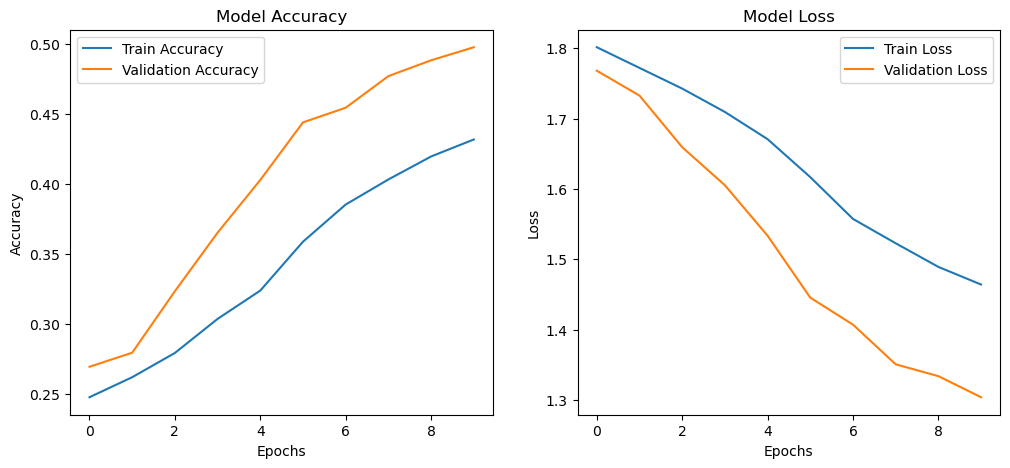

In [5]:
# ======== Plot Training Results ========
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

Model: "Emotion_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,377 (4.86 MB)

 Trainable params: 1,274,375 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Conv Layers: ['conv2d_6', 'conv2d_7', 'conv2d_8']


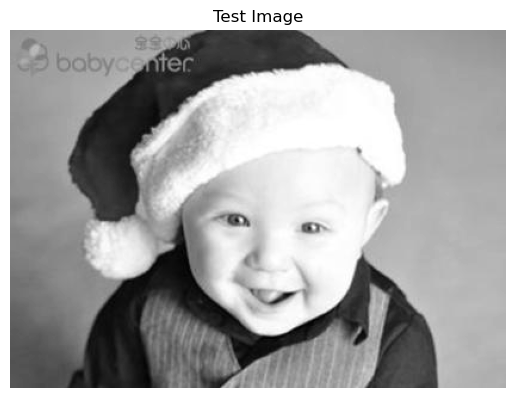

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


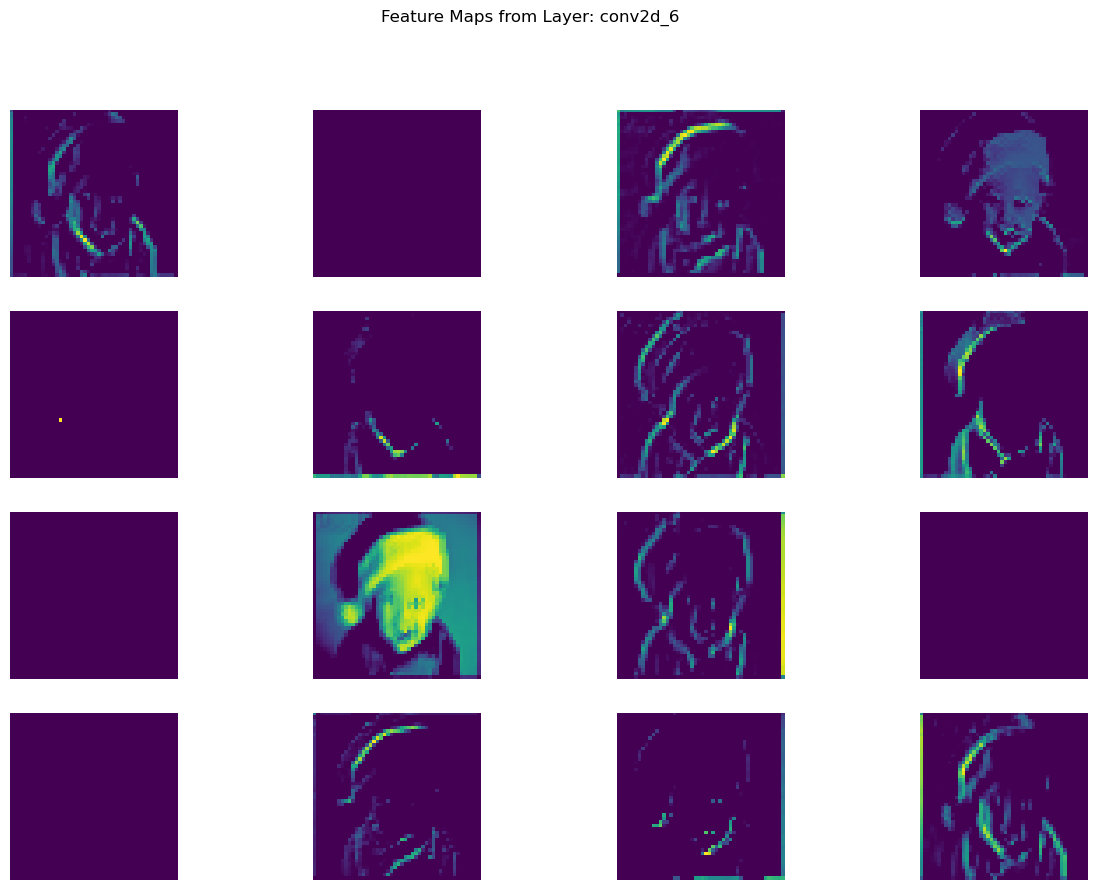

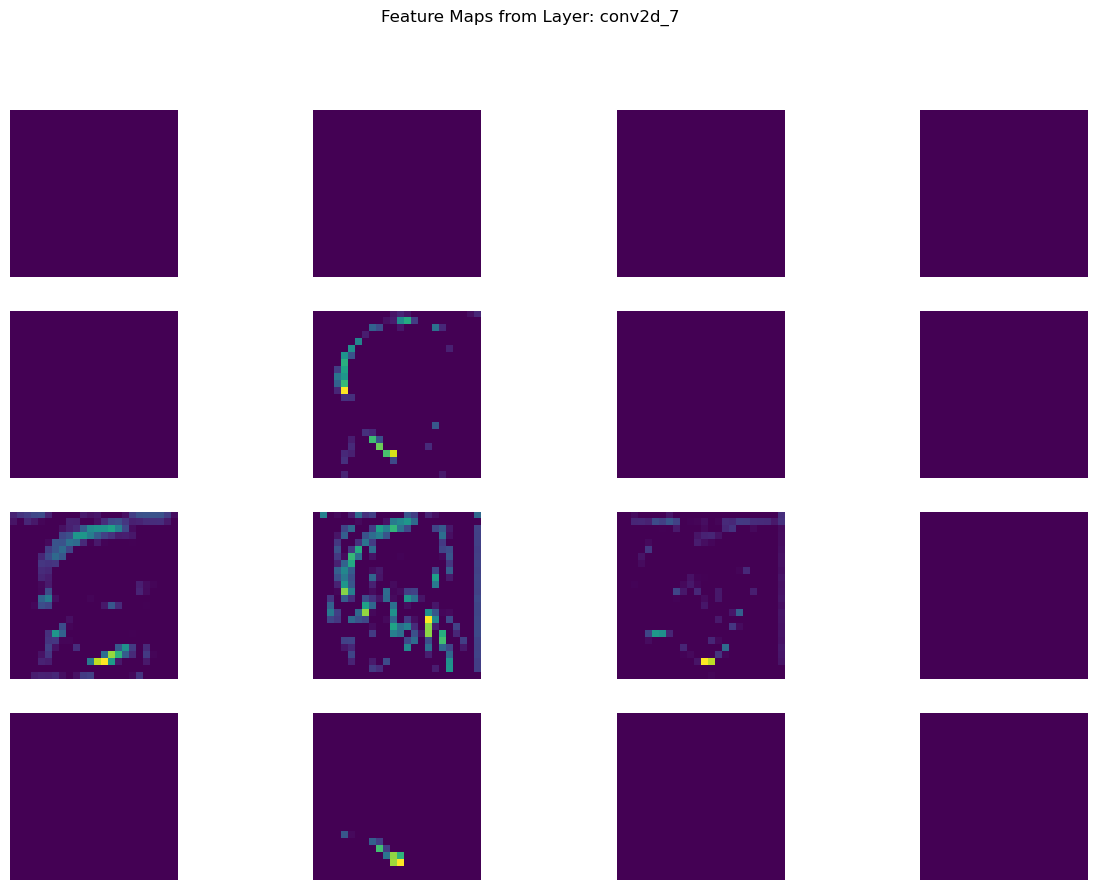

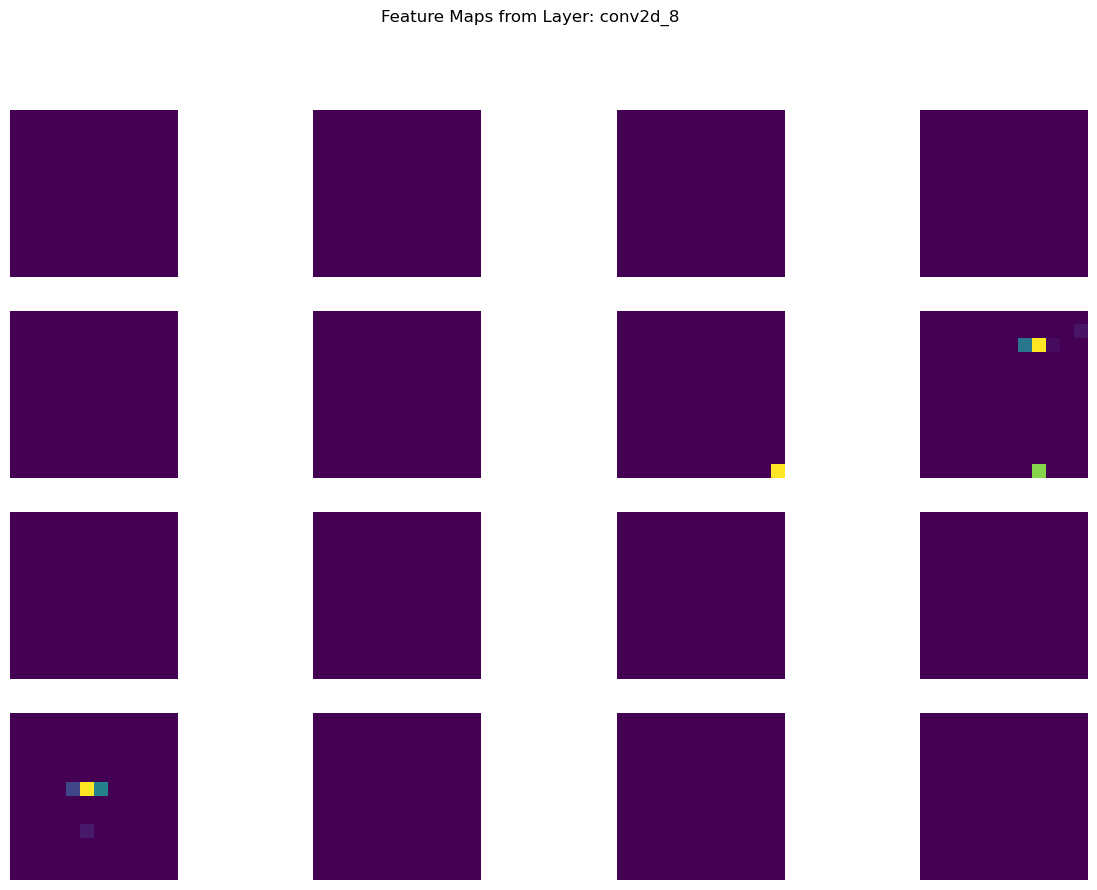

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the trained model
model = tf.keras.models.load_model("fer2013_emotion_cnn_functional.h5")
model.summary()

# Extract layer names for visualization
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]
print("Conv Layers:", layer_names)

# Define an activation model to get feature maps
activation_model = tf.keras.Model(inputs=model.input, 
                                  outputs=[model.get_layer(name).output for name in layer_names])

# Load and preprocess a sample image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    img = cv2.resize(img, (48, 48))  # Resize to match model input size
    img = img.astype("float32") / 255.0  # Normalize
    img = np.expand_dims(img, axis=[0, -1])  # Add batch & channel dimensions
    return img

# Replace with your test image path
test_image_path = r"C:\Users\sreel\Downloads\emotion detection.jpg"

img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Test Image")
plt.axis("off")
plt.show()

test_img = preprocess_image(test_image_path)

# Get feature maps (activations)
activations = activation_model.predict(test_img)

# Function to plot feature maps
def plot_feature_maps(activations, layer_names):
    for i, activation in enumerate(activations):
        num_filters = activation.shape[-1]  # Number of filters in the layer
        size = activation.shape[1]  # Size of feature maps
        
        plt.figure(figsize=(15, 10))
        plt.suptitle(f"Feature Maps from Layer: {layer_names[i]}")
        
        for j in range(min(16, num_filters)):  # Show only first 16 filters
            plt.subplot(4, 4, j+1)
            plt.imshow(activation[0, :, :, j], cmap="viridis")
            plt.axis("off")
        
        plt.show()

# Plot activation maps
plot_feature_maps(activations, layer_names)
